# 1.0 Installing and Getting familiar to Qiskit

In [1]:
!pip install qiskit

     |████████████████████████████████| 8.3MB 2.7MB/s 
     |████████████████████████████████| 16.5MB 245kB/s 
     |████████████████████████████████| 163kB 40.8MB/s 
     |████████████████████████████████| 174kB 43.8MB/s 
     |████████████████████████████████| 1.9MB 17.4MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 962kB 38.2MB/s 
     |████████████████████████████████| 5.8MB 43.4MB/s 
     |████████████████████████████████| 296kB 39.1MB/s 
     |████████████████████████████████| 71kB 8.8MB/s 
     |████████████████████████████████| 583kB 37.1MB/s 
     |████████████████████████████████| 102kB 10.7MB/s 
     |████████████████████████████████| 2.6MB 43.7MB/s 
  Created wheel for qiskit: filename=qiskit-0.20.0-cp36-none-any.whl size=3023 sha256=6ba8bbe1c4b9c584a1d9ce672b83425a6b63eb684a18562f6c769b6a522983e4
  Stored in directory: /root/.cache/pip/wheels/72/97/19/dd8931ed9c3115e216522129025614effb4494c96aad7fea0d
  Created wheel for

In [2]:
!pip install pylatexenc

     |████████████████████████████████| 163kB 2.7MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.7-cp36-none-any.whl size=130764 sha256=3b026a55792b6597ad4f58af2f7b950ac3064c2c13ff1ed049dcac4eab74ba3c
  Stored in directory: /root/.cache/pip/wheels/d3/e6/ca/261bd01506ba7e835ed21bfec202389cf670198b87cde58a84
Successfully built pylatexenc


## **1.1 Introduction** 

**Bit** : The smallest unit of information (either 0 or 1)

**Qubit** : The bits that follow the laws of Quantum Mechanics and can be both 0 and 1 at the same time.



Subjects that will make this notebook a little easier:

* Linear Algebra

* Python

* Jupyter Notebook

## **1.2 The Atoms of Computation**






**Quick Exercises**

Q1 Write down a number in binary format.

Let the number be **25**

Now, we can represent the number in the binary format - **11001**

Q2 If you have n bits, how many different states can they be in?

For **n** bits, there can be **2 to the power n** states.

**Building the First Quantum Circuit using Qiskit**

In [3]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [4]:
#Creating a simple Quantum Circuit
n = 8
nq = n
nb = n
qc_output = QuantumCircuit(nq,nb)

In [5]:
#Performing the measure operation
for i in range(n):
  qc_output.measure(i,i)


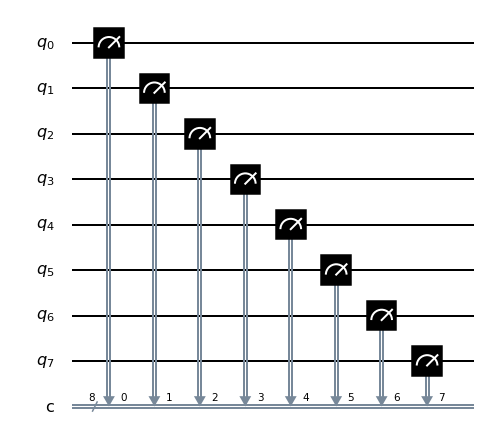

In [6]:
qc_output.draw('mpl')

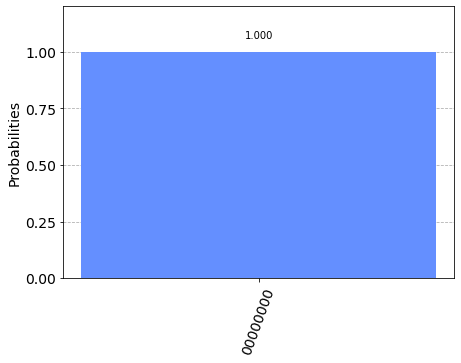

In [7]:
#A qubit is always initialized as zero
#Therefore, if no operation is performed, we get 0 as the output
#In this case, we should get 0000000, one 0 for each qubit
#Let's verify this
counts = execute(qc_output,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

A Quanntum Circuit has three important parts:

*   Encoding the input
*   Performing the Operations
*   Extracting the Output


In [8]:
#Encoding the input
n = 8
qc_encode = QuantumCircuit(n)
qc_encode.x(7)#Applying NOT gate on the last(seventh) qubit(Performing the Operation)

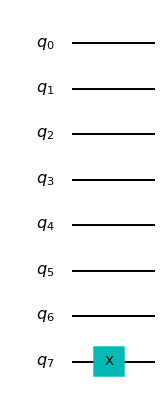

In [9]:
qc_encode.draw('mpl')

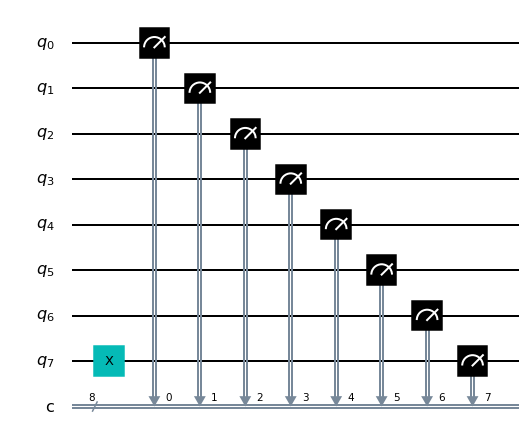

In [10]:
#We can perform the task of outpit extraction using the 'qc_output' circuit from the previous section
qc = qc_encode + qc_output #Adding the input and output circuit
qc.draw(output='mpl',justify='none')

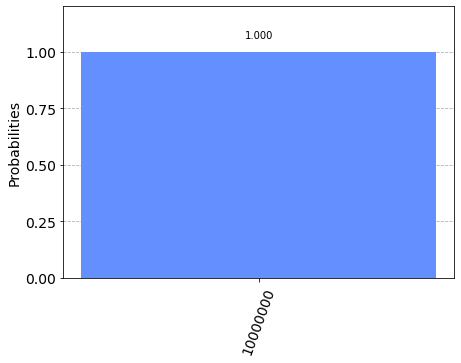

In [11]:
#Visualizing the output using histogram
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

The above output is **1000000** and not **0000001**

This is because qiskit reads from right to left and not left to right

This has various advantages 

**Writing the number 25 using Quantum Circuit**

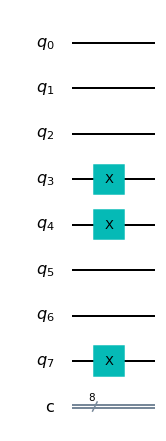

In [12]:
num = QuantumCircuit(8,8)
num.x(3)
num.x(4)
num.x(7)
num.draw('mpl')

In [13]:
for i in range(8):
  num.measure(i,i)

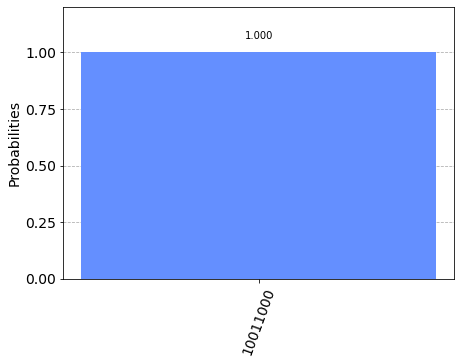

In [14]:
output = execute(num,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(output)

**The CNOT Gate**

In [15]:
#A CNOT Gate uses 2 qubits, a controller and a target
#If the two qubits are same, it changes the value of target qubit
#CNOT Gate is similar to the conventional XOR Gate
#Here we develop a simple CNOT Gate
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)

In [16]:
#Visualiazing the CNOT Gate
qc_cnot.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

In [17]:
#Now, let us make a better circuit with CNOT Gate and measure it
qc = QuantumCircuit(2,2)
qc.x(0)
qc.cx(0,1)
qc.measure(0,0)
qc.measure(1,1)
qc.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [18]:
output = execute(qc,Aer.get_backend('qasm_simulator'))
print(output)

In [19]:
#Now, we are ready to build the half adder ciruit
qc_ha = QuantumCircuit(4,2)
#Encoding the input, (1,1) in this case
qc_ha.x(0)
qc_ha.x(1)
qc_ha.barrier()
#Now we build the CNOT Gates
qc_ha.cx(0,2)
qc_ha.cx(1,2)
#Now we build the Toffoli gate (similar to the conventional AND Gate)
qc_ha.ccx(0,1,3)
qc_ha.barrier()
#Now we perform the operation of measurememt to extract the outputs
qc_ha.measure(2,0)
qc_ha.measure(3,1)

In [20]:
qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c: 2/═══════════════════════════╩══╩═
                                0  1

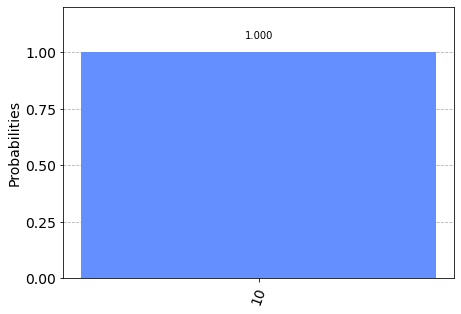

In [21]:
counts = execute(qc_ha,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

## **1.3 Representing the Qubit States**

Initially all the qubits are in the state |0>

However, we can use the **initialize()** method to define the state of desired qubit(s).

In [22]:
 eg1 = QuantumCircuit(1) #eg1 is the Quantum Circuit that consists of 1 Qubit with state  
 state = [0,1] #Equivalent to |1>
 eg1.initialize(state,0) #Changing the state of qubit 0 from |0> to |1>

In [23]:
eg1.draw()

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

In [24]:
backend = Aer.get_backend('statevector_simulator')
result = execute(eg1,backend).result()
out_state = result.get_statevector()
print(out_state)

[0.+0.j 1.+0.j]


**Implementing the Superposition State**

In [25]:
import math as m
supstate = [1/m.sqrt(2),1j/m.sqrt(2)] #The superposition state
qc_ss = QuantumCircuit(1)
qc_ss.initialize(supstate,0) 
state = execute(qc_ss,backend).result().get_statevector() #backend = Aer.get_backend('statevector_simulator')
print(state)

[0.70710678+0.j         0.        +0.70710678j]


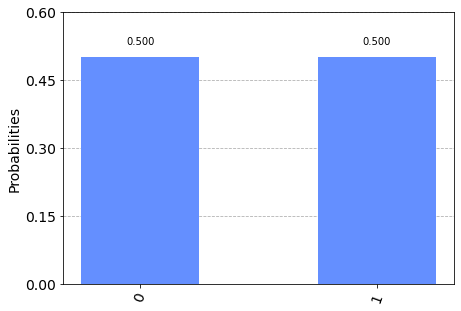

In [26]:
#Let's visualize what we have done in the above cell
counts = execute(qc_ss,backend).result().get_counts()
plot_histogram(counts)

**The Bloch Sphere**

A Bloch Sphere is just a representation that projects 2D statevector to 3D visualization

In [27]:
#Let us perform the exercise
#Visualizing the following states through Bloch Sphere
state1 = [0,0,1] #|0>
state2 = [0,0,-1] #|1>
state3 = [1,0,0] #|+>
state4 = [0,-1,0] #|-i>
state5 = [0,1,0] #|+i>

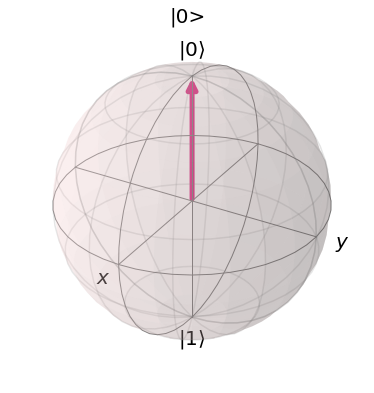

In [28]:
from qiskit.visualization import plot_bloch_vector
plot_bloch_vector(state1,'|0>')
#Clearly, the values are x=0, y=0, z=1

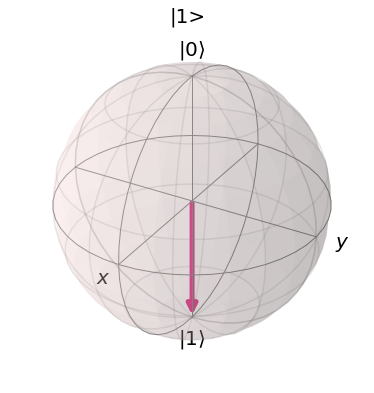

In [29]:
plot_bloch_vector(state2,'|1>')
#Clearly, the values are x=0, y=0, z=-1

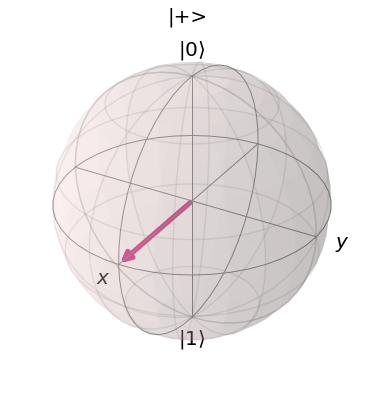

In [30]:
plot_bloch_vector(state3,'|+>')
#Here, after calculations we get theta = PI/2 and phi = 0
#Therefore, we use the formulae listed below to calculate x,y,z
# x = sin(theta) * cos(phi)
# y = sin(theta) * sin(phi)
# z = cos(theta)

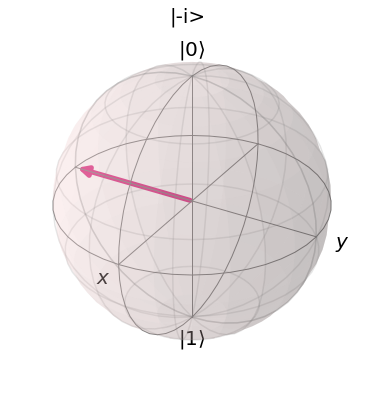

In [31]:
plot_bloch_vector(state4,'|-i>')
#Here, after calculations we get theta = PI/2 and phi = (3*PI)/2
#Therefore, we use the formulae listed below to calculate x,y,z
# x = sin(theta) * cos(phi)
# y = sin(theta) * sin(phi)
# z = cos(theta)

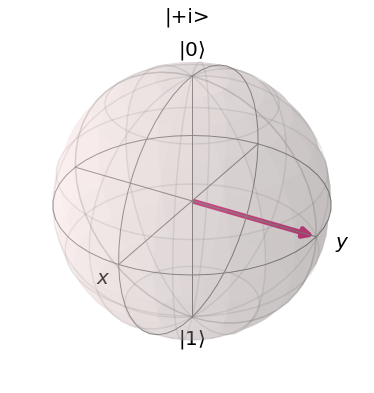

In [32]:
plot_bloch_vector(state5,'|+i>')
#Here, after calculations we get theta = PI/2 and phi = PI/2
#Therefore, we use the formulae listed below to calculate x,y,z
# x = sin(theta) * cos(phi)
# y = sin(theta) * sin(phi)
# z = cos(theta)

## **1.4 The Single Qubit Gates**

**The X-Gate**

As previously discussed, the X-Gate is usually referred to as NOT Gate

It flips the Quantum State of a Qubit

X = [[0,1],
    [1,0]]

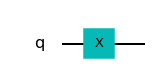

In [33]:
qc_xg = QuantumCircuit(1)
qc_xg.x(0)
qc_xg.draw('mpl')

**The Y & Z Gates**

The Y Gate turns around a vector by PI radians around Y-axis in Bloch Sphere

The Z Gate turns around a vector by PI radians around Z-axis in Bloch Sphere

Y = [[0,-i],
    [i,0]]

Z = [[1,0],
    [0,-1]]

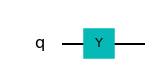

In [34]:
#Let's implement and visualize the Y Gate
qc_yg = QuantumCircuit(1)
qc_yg.y(0)
qc_yg.draw('mpl')

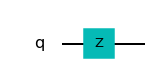

In [35]:
#Let's implement the Z-Gate 
qc_zg = QuantumCircuit(1)
qc_zg.z(0)
qc_zg.draw('mpl')

**Exercise**

In [37]:
#Q1.
import numpy as np
plus = np.asarray(([1/m.sqrt(2)],
                    [1/m.sqrt(2)]))
X = np.asarray(([0,1], [1,0]))
result = X @ plus #Matrix Multiplication
print(result)

[[0.70710678]
 [0.70710678]]


In [38]:
#Q1.
minus = np.asarray(([1/m.sqrt(2)],
                    [-1/m.sqrt(2)]))
X = np.asarray(([0,1], [1,0]))
result = X @ minus #Matrix Multiplication
print(result)

[[-0.70710678]
 [ 0.70710678]]


In [39]:
#Q4
import scipy.linalg as al
Y = np.asarray(([0,-1j],[1j,0]),dtype='complex')
results = al.eig(Y)
print('The eigen vectors or eigenstates of the vector Y are:')
print(results[1])

The eigen vectors or eigenstates of the vector Y are:
[[-0.        -0.70710678j  0.70710678+0.j        ]
 [ 0.70710678+0.j          0.        -0.70710678j]]


**The Hadamard Gate**

Hadamard is a gate that allows the qubit to achieve a Superposition state between |0> and |1>

H = ([1/sqrt(2),1/sqrt(2)], [1/sqrt(2),-1/sqrt(2)])

H|0> = |+>

H|1> = |->

**Exercise**

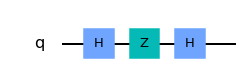

In [40]:
#Q2
#Let us first compute HZH on a qubuit with Quantum State |0>
qc_eg = QuantumCircuit(1)
qc_eg.h(0)
qc_eg.z(0)
qc_eg.h(0)
qc_eg.draw('mpl')


In [41]:
output = execute(qc_eg,Aer.get_backend('statevector_simulator')).result().get_statevector()

Clearly, the output is |1>

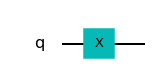

In [42]:
#Now, let us apply X - Gate 
qc_eg2 = QuantumCircuit(1)
qc_eg2.x(0)
qc_eg2.draw('mpl')

In [45]:
output = execute(qc_eg2,Aer.get_backend('statevector_simulator')).result().get_statevector()
print(output)

[0.+0.j 1.+0.j]


As Expected, the output is |1>

Therefore, the result of computation of X and HZH is the same

**Digression: Measuring in different states**

In [ ]:
# Create the X-measurement function:
def x_measurement(qc,qubit,cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    qc.h(qubit)
    return qc

from qiskit.extensions import Initialize # Import the Inititialize function
# Initialise our qubit and measure it
qc = QuantumCircuit(1,1)
initial_state = [0,1]
initializer = Initialize(initial_state)
initializer.label = "init"
qc.append(initializer, [0])
x_measurement(qc, 0, 0)
qc.draw('mpl')

As seen previously, X = HZH

If we apply this to the basis, this also holds true

In Qiskit we cannot plot Bloch Vector directly for X - basis

Therefore, we apply Measurement in Z-basis sandwiched between the two Hadamard Gates. This produces the same effect as measuring in the X - basis.


**The R-phi Gate**

The R-phi or R-z Gate requires a real number 'phi' as an input.

Essentially, it just performs a rotation by phi around Z-axis

R-phi = [1,0],[0, exp(phi)]

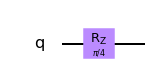

In [46]:
qc_rz = QuantumCircuit(1)
qc_rz.rz(m.pi/4,0) #Applying R-z Gate with phi = PI/4
qc_rz.draw('mpl')

**The I, S and T Gates**

**The I Gate**

The I Gate is simply called Id or Identity Gate

With no surprises, the matrix of this gate is Identity Matrix

It is usually of use to define None Operation or for proving some results

**The S Gate**

The S Gate is a specialized R-z gate with phi = PI/2

Unlike the gates mentioned above, the S Gate is not its own inverse.

For S-Inverse, we have phi = -PI/2

The S Gate is generally known as sqrt(Z-Gate). This is because applying two S gates has the same effect of applying one Z Gate

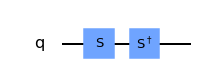

In [47]:
qc_s = QuantumCircuit(1)
qc_s.s(0) #Applying the S Gate
qc_s.sdg(0) #Applying the S-Inverse Gate
qc_s.draw('mpl')

**The T Gate**

The T Gate is a specialized R-z gate with phi = PI/4

Like the S Gate mentioned above, the T Gate is not its own inverse.

For T-Inverse, we have phi = -PI/4

The T Gate is generally known as fourth root of Z Gate. This is because applying four S gates has the same effect of applying one Z Gate

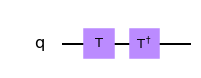

In [48]:
qc_t = QuantumCircuit(1)
qc_t.t(0) #Applying the T Gate
qc_t.tdg(0) #Applying the T-Inverse Gate
qc_t.draw('mpl')

**The General U Gate**

The most general gate is U-3 gate.

Qiskit provides U-1 and U-2 gates, which are general form of U-3 gate.

All the Single Qubit operations are first compiled to these U Gates before the simulation.

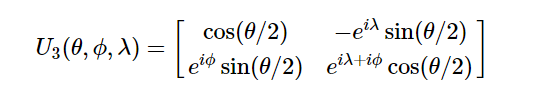

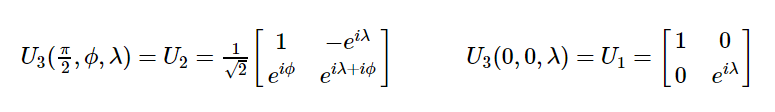

**This marks the end of Section 1 - Quantum States and Qubits**